In [1]:
import pandas as pd
import json
import os
import difflib
import unicodedata
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

df_intit = pd.read_excel("Registro simplificado de participaciones en instancias externas.xlsx")

print(df_intit.columns)

# Normalizar nombres de columnas (quita saltos de línea y espacios duros)
df_intit.columns = (
    df_intit.columns
    .str.replace(r"\s+", " ", regex=True)   # reemplaza múltiples espacios o saltos por uno solo
    .str.strip()                            # quita espacios al inicio/fin
)

df_intit.rename(columns={
    df_intit.columns[4]: "Nombre Correo",
    df_intit.columns[5]: "Nombre",
    df_intit.columns[6]: "Género",
    df_intit.columns[7]: "Sexo",
    df_intit.columns[8]: "Dependencia",
    df_intit.columns[9]: "Unidad No Académica",
    df_intit.columns[10]: "Programa de Magíster",
    df_intit.columns[11]: "Núcleos de Investigación",
    df_intit.columns[12]: "Centros de Investigación",
    df_intit.columns[13]: "Programa de Doctorado",
    df_intit.columns[14]: "Escuela/Carrera Facultad de Ciencias Sociales y Artes",
    df_intit.columns[15]: "Escuela/Carrera Facultad de Ciencias, Ingeniería y Tecnología",
    df_intit.columns[16]: "Escuela/Carrera Medicina y Ciencias de la Salud",
    df_intit.columns[17]: "Especialidad Odontológica",
    df_intit.columns[18]: "Especialidad Médica",
    df_intit.columns[19]: "Sede",
    df_intit.columns[20]: "Participación",
    df_intit.columns[21]: "Actividad Alumni",
    df_intit.columns[22]: "Años Actividad Alumni",
    df_intit.columns[23]: "Descripción Actividad Alumni",
    df_intit.columns[24]: "Cant. participantes",
    df_intit.columns[25]: "Nombre Actor externo Alumni",
    df_intit.columns[26]: "Nombre Mesa",
    df_intit.columns[27]: "Nombre Actor externo Mesa",
    df_intit.columns[28]: "Descripción Mesa",
    df_intit.columns[43]: "Fecha inicio Actividad",
    df_intit.columns[44]: "Fecha termino Actividad",
    df_intit.columns[45]: "Nombre Actividad",
    df_intit.columns[46]: "Año Actividad",
    df_intit.columns[47]: "Ciudad Actividad",
    df_intit.columns[48]: "País Actividad",
    df_intit.columns[49]: "Objetivo Actividad",
    df_intit.columns[50]: "Asignatura asociada",
    df_intit.columns[51]: "Docente responsable Actividad",
    df_intit.columns[52]: "Nombre Actor externo Actividad",
    df_intit.columns[55]: "Ámbitos Estratégicos Actividad",
    df_intit.columns[56]: "Objetivos de Desarrollo Sostenible (ODS) Actividad",
    df_intit.columns[57]: "Retroalimentación",
    df_intit.columns[58]: "Documentos",
}, inplace=True)

print(df_intit.columns.tolist())

Index(['Id', 'Hora de inicio', 'Hora de finalización', 'Correo electrónico',
       'Nombre', 'Nombre\n(Indique su nombre completo)',
       'Género\n (Indique su género)',
       'Sexo registral\n Esta información se solicita exclusivamente con fines de reporte estadístico institucional, en función de los requerimientos de la Comisión Nacional de Acreditación (CNA), que exige es',
       'Dependencia a la que Pertenece\n(Indique la dirección, oficina, programa o unidad específica dentro de la universidad que representa)',
       'Unidad No Académica\n(Por favor, señale la Unidad No Académica a la que representa)',
       'Programa de Magíster\n(Por favor, indique el Programa de Magíster al que representa)',
       'Núcleos de Investigación\n(Por favor, indique el Núcleo al que representa)',
       'Centros de Investigación\n(Por favor, indique el Centro al que representa)',
       'Programa de Doctorado\n(Por favor, indique el Programa de Doctorado al que representa)',
       'Escuela

In [2]:
def dividir_por_dependencia(df, col_index=8):
    # Mostrar dimensiones
    print(f"DataFrame recibido: {df.shape[0]} filas y {df.shape[1]} columnas")

    # Obtener nombre de la columna de dependencia
    col_dependencia = df.columns[col_index]
    print(f"Usando columna: {col_dependencia}")

    # Quitar filas sin dependencia
    df = df.dropna(subset=[col_dependencia])

    # Agrupar por dependencia
    dependencias = {dep: grupo for dep, grupo in df.groupby(col_dependencia)}

    print(f"\nSe generaron {len(dependencias)} DataFrames por dependencia.")
    print("Puedes acceder a ellos así: dfs['Nombre de la dependencia']")
    return dependencias

In [3]:
df_dependencias = dividir_por_dependencia(df_intit)

# Mostrar los nombres de las dependencias disponibles
print("\nDependencias detectadas:")
for nombre in df_dependencias.keys():
    print("-", nombre)

DataFrame recibido: 169 filas y 59 columnas
Usando columna: Dependencia

Se generaron 8 DataFrames por dependencia.
Puedes acceder a ellos así: dfs['Nombre de la dependencia']

Dependencias detectadas:
- Centro de Investigación
- Especialidad Médica
- Facultad de Ciencias Sociales y Artes
- Facultad de Ciencias, Ingeniería y Tecnología
- Facultad de Medicina y Ciencias de la Salud
- Programa Magíster
- Programa de Doctorado
- Unidad Técnica y Tecnológica TEC MAYOR


In [4]:
def eliminar_columnas_por_indice(dfs, dependencia, indices):
    df = dfs.get(dependencia)
    if df is None:
        print(f"No existe la dependencia: {dependencia}")
        return
    try:
        df.drop(df.columns[indices], axis=1, inplace=True)
        print(f"Columnas {indices} eliminadas de '{dependencia}'")
    except Exception as e:
        print(f"Error eliminando columnas de {dependencia}: {e}")

In [5]:
eliminar_columnas_por_indice(df_dependencias, "Centro de Investigación", [9, 10, 11, 13, 14, 15, 16, 17, 18])
eliminar_columnas_por_indice(df_dependencias, "Especialidad Médica", [9, 10, 11, 12, 13, 14, 15, 16, 17])
eliminar_columnas_por_indice(df_dependencias, "Facultad de Ciencias Sociales y Artes", [9, 10, 11, 12, 13, 15, 16, 17, 18])
eliminar_columnas_por_indice(df_dependencias, "Facultad de Ciencias, Ingeniería y Tecnología", [9, 10, 11, 12, 13, 14, 16, 17, 18])
eliminar_columnas_por_indice(df_dependencias, "Facultad de Medicina y Ciencias de la Salud", [9, 10, 11, 12, 13, 14, 15, 17, 18])
eliminar_columnas_por_indice(df_dependencias, "Programa Magíster", [9, 11, 12, 13, 14, 15, 16, 17, 18])
eliminar_columnas_por_indice(df_dependencias, "Programa de Doctorado", [9, 10, 11, 12, 14, 15, 16, 17, 18])
eliminar_columnas_por_indice(df_dependencias, "Unidad Técnica y Tecnológica TEC MAYOR", [9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
eliminar_columnas_por_indice(df_dependencias, "Especialidad Odontológica", [9, 10, 11, 12, 13, 14, 15, 16, 18])
eliminar_columnas_por_indice(df_dependencias, "Núcleo de Investigación", [9, 10, 12, 13, 14, 15, 16, 17, 18])
eliminar_columnas_por_indice(df_dependencias, "Otras Unidades No Académicas", [10, 11, 12, 13, 14, 15, 16, 17, 18])

df_ejemplo = df_dependencias["Especialidad Médica"]
display(df_ejemplo.head())

Columnas [9, 10, 11, 13, 14, 15, 16, 17, 18] eliminadas de 'Centro de Investigación'
Columnas [9, 10, 11, 12, 13, 14, 15, 16, 17] eliminadas de 'Especialidad Médica'
Columnas [9, 10, 11, 12, 13, 15, 16, 17, 18] eliminadas de 'Facultad de Ciencias Sociales y Artes'
Columnas [9, 10, 11, 12, 13, 14, 16, 17, 18] eliminadas de 'Facultad de Ciencias, Ingeniería y Tecnología'
Columnas [9, 10, 11, 12, 13, 14, 15, 17, 18] eliminadas de 'Facultad de Medicina y Ciencias de la Salud'
Columnas [9, 11, 12, 13, 14, 15, 16, 17, 18] eliminadas de 'Programa Magíster'
Columnas [9, 10, 11, 12, 14, 15, 16, 17, 18] eliminadas de 'Programa de Doctorado'
Columnas [9, 10, 11, 12, 13, 14, 15, 16, 17, 18] eliminadas de 'Unidad Técnica y Tecnológica TEC MAYOR'
No existe la dependencia: Especialidad Odontológica
No existe la dependencia: Núcleo de Investigación
No existe la dependencia: Otras Unidades No Académicas


,Id,Hora de inicio,Hora de finalización,Correo electrónico,Nombre Correo,Nombre,Género,Sexo,Dependencia,Especialidad Médica,...,Objetivo Actividad,Asignatura asociada,Docente responsable Actividad,Nombre Actor externo Actividad,N° Estudiantes participantes en la salida (HOMBRES),N° Estudiantes participantes en la salida (MUJERES),Ámbitos Estratégicos Actividad,Objetivos de Desarrollo Sostenible (ODS) Actividad,Retroalimentación,Documentos
63,64,2025-08-12 15:12:29,2025-08-12 15:17:52,pilar.gonzalez@umayor.cl,Pilar Gabriela Gonzalez Henriquez,Pilar Gabriela González Henríquez,Femenino,Mujer,Especialidad Médica,Med. Física y Rehabilitación,...,NaN,NaN,NaN,NaN,NaN,NaN,Salud Integral y Bienestar,3: Salud y Bienestar,Ninguna,NaN
67,68,2025-08-12 15:18:08,2025-08-12 17:07:45,pilar.gonzalez@umayor.cl,Pilar Gabriela Gonzalez Henriquez,Pilar Gabriela Gonzalez Henriquez,Femenino,Mujer,Especialidad Médica,Med. Física y Rehabilitación,...,NaN,NaN,NaN,NaN,NaN,NaN,Salud Integral y Bienestar,3: Salud y Bienestar,Ninguno,NaN
68,69,2025-08-12 17:09:02,2025-08-12 17:17:21,pilar.gonzalez@umayor.cl,Pilar Gabriela Gonzalez Henriquez,Pilar Gabriela Gonzalez Henriquez,Femenino,Mujer,Especialidad Médica,Med. Física y Rehabilitación,...,NaN,NaN,NaN,NaN,NaN,NaN,Educación de Calidad y Equitativa,4: Educación de Calidad,Ninguno,NaN
69,70,2025-08-12 17:17:27,2025-08-12 17:20:38,pilar.gonzalez@umayor.cl,Pilar Gabriela Gonzalez Henriquez,Pilar Gabriela Gonzalez Henriquez,Femenino,Mujer,Especialidad Médica,Med. Física y Rehabilitación,...,NaN,NaN,NaN,NaN,NaN,NaN,Educación de Calidad y Equitativa,4: Educación de Calidad,Ninguno,NaN
70,71,2025-08-12 17:20:47,2025-08-12 17:24:29,pilar.gonzalez@umayor.cl,Pilar Gabriela Gonzalez Henriquez,Pilar Gabriela Gonzalez Henriquez,Femenino,Mujer,Especialidad Médica,Med. del Deporte y Act. Física,...,NaN,NaN,NaN,NaN,NaN,NaN,Salud Integral y Bienestar;Educación de Calida...,3: Salud y Bienestar;4: Educación de Calidad,Ninguno,NaN


In [6]:
os.makedirs("Dependencias", exist_ok=True)

# Exportar cada DataFrame por separado
for nombre, df in df_dependencias.items():
    nombre_archivo = f"Dependencias/{nombre.replace('/', '_').replace(' ', '_')}.xlsx"
    df.to_excel(nombre_archivo, index=False)
    print("Guardado: " + nombre_archivo)

print("✅ Archivos exportados en la carpeta 'Dependencias'")

Guardado: Dependencias/Centro_de_Investigación.xlsx
Guardado: Dependencias/Especialidad_Médica.xlsx
Guardado: Dependencias/Facultad_de_Ciencias_Sociales_y_Artes.xlsx
Guardado: Dependencias/Facultad_de_Ciencias,_Ingeniería_y_Tecnología.xlsx
Guardado: Dependencias/Facultad_de_Medicina_y_Ciencias_de_la_Salud.xlsx
Guardado: Dependencias/Programa_Magíster.xlsx
Guardado: Dependencias/Programa_de_Doctorado.xlsx
Guardado: Dependencias/Unidad_Técnica_y_Tecnológica_TEC_MAYOR.xlsx
✅ Archivos exportados en la carpeta 'Dependencias'


In [7]:
def normalizar(texto):
    """Convierte texto a minúsculas sin acentos ni caracteres especiales."""
    if not isinstance(texto, str):
        return ""
    texto = texto.lower()
    texto = ''.join(
        c for c in unicodedata.normalize('NFD', texto)
        if unicodedata.category(c) != 'Mn'
    )
    return texto

In [8]:
def encontrar_columna_asociada(nombre_dep, columnas):
    """
    Busca la columna más parecida al nombre de la dependencia,
    tolerando diferencias como plural/singular, mayúsculas y acentos.
    """
    nombre_norm = normalizar(nombre_dep)
    columnas_norm = [normalizar(c) for c in columnas]

    # Buscar coincidencias por similitud
    coincidencias = difflib.get_close_matches(nombre_norm, columnas_norm, n=1, cutoff=0.6)

    if coincidencias:
        idx = columnas_norm.index(coincidencias[0])
        return columnas[idx]  # Retorna el nombre original de la columna
    else:
        return None


In [9]:
def subdividir_por_dependencia(dfs):
    """
    Divide los DataFrames de un diccionario según la columna asociada
    más parecida al nombre de la dependencia.
    """
    subdivididos = {}

    for nombre_dep, df in dfs.items():
        print(f"\nProcesando dependencia: {nombre_dep}")

        # Encontrar columna asociada automáticamente
        col_asociada = encontrar_columna_asociada(nombre_dep, df.columns)

        if not col_asociada or col_asociada == 'Dependencia':
            print(f"  ⚠ No se encontró columna asociada (se mantiene sin subdividir).")
            subdivididos[nombre_dep] = {nombre_dep: df}
            continue

        print(f"  ➤ Columna asociada detectada: {col_asociada}")

        # Agrupar por esa columna asociada
        grupos = {
            valor: grupo for valor, grupo in df.groupby(col_asociada)
            if pd.notna(valor)
        }

        subdivididos[nombre_dep] = grupos
        print(f"  → Se generaron {len(grupos)} subgrupos")

    print("\n✅ Subdivisión completa.")
    return subdivididos

In [10]:
dfs_subdivididos = subdividir_por_dependencia(df_dependencias)



Procesando dependencia: Centro de Investigación
  ➤ Columna asociada detectada: Centros de Investigación
  → Se generaron 4 subgrupos

Procesando dependencia: Especialidad Médica
  ➤ Columna asociada detectada: Especialidad Médica
  → Se generaron 3 subgrupos

Procesando dependencia: Facultad de Ciencias Sociales y Artes
  ➤ Columna asociada detectada: Escuela/Carrera Facultad de Ciencias Sociales y Artes
  → Se generaron 1 subgrupos

Procesando dependencia: Facultad de Ciencias, Ingeniería y Tecnología
  ➤ Columna asociada detectada: Escuela/Carrera Facultad de Ciencias, Ingeniería y Tecnología
  → Se generaron 1 subgrupos

Procesando dependencia: Facultad de Medicina y Ciencias de la Salud
  ➤ Columna asociada detectada: Escuela/Carrera Medicina y Ciencias de la Salud
  → Se generaron 6 subgrupos

Procesando dependencia: Programa Magíster
  ➤ Columna asociada detectada: Programa de Magíster
  → Se generaron 3 subgrupos

Procesando dependencia: Programa de Doctorado
  ➤ Columna asoci

In [11]:
# Crear la carpeta principal
os.makedirs("Dependencias", exist_ok=True)

# Exportar cada sub-DataFrame
for dependencia, subgrupos in dfs_subdivididos.items():
    # Crear subcarpeta para cada dependencia
    carpeta_dep = os.path.join("Dependencias", dependencia.replace("/", "_").replace(" ", "_"))
    os.makedirs(carpeta_dep, exist_ok=True)

    for nombre_sub, df_sub in subgrupos.items():
        # Limpiar nombre de archivo
        nombre_archivo = f"{carpeta_dep}/{str(nombre_sub).replace('/', '_').replace(' ', '_')}.xlsx"

        # Guardar el archivo
        df_sub.to_excel(nombre_archivo, index=False)

        print(f"✅ Guardado: {nombre_archivo}")

print("\n📂 Todos los archivos fueron exportados en la carpeta 'Dependencias'")

✅ Guardado: Dependencias\Centro_de_Investigación/Centro_de_Economía_y_Políticas_Sociales_(CEAS).xlsx
✅ Guardado: Dependencias\Centro_de_Investigación/Centro_de_Genoma,_Ecología_y_Medio_Ambiente_(GEMA).xlsx
✅ Guardado: Dependencias\Centro_de_Investigación/Centro_de_Investigación_en_Sociedad_y_Salud_(CISS).xlsx
✅ Guardado: Dependencias\Centro_de_Investigación/Centro_de_Nanotecnología_Aplicada_(CNAP).xlsx
✅ Guardado: Dependencias\Especialidad_Médica/Med._Física_y_Rehabilitación.xlsx
✅ Guardado: Dependencias\Especialidad_Médica/Med._del_Deporte_y_Act._Física.xlsx
✅ Guardado: Dependencias\Especialidad_Médica/Pediatría.xlsx
✅ Guardado: Dependencias\Facultad_de_Ciencias_Sociales_y_Artes/Gobierno_y_Administración_Pública.xlsx
✅ Guardado: Dependencias\Facultad_de_Ciencias,_Ingeniería_y_Tecnología/Ingeniería_en_Medio_Ambiente_y_Sustentabilidad.xlsx
✅ Guardado: Dependencias\Facultad_de_Medicina_y_Ciencias_de_la_Salud/Fonoaudiología.xlsx
✅ Guardado: Dependencias\Facultad_de_Medicina_y_Ciencias_de_

In [13]:
def graficar_duracion_participacion(
    dfs_subdivididos,
    dependencia,
    subgrupo,
    fecha_inicio=None,
    fecha_fin=None
):
    """
    Genera un gráfico tipo Gantt mostrando duración de actividades.
    Cada barra representa un Id y muestra también el tipo de Participación.
    Debajo del gráfico se muestra una leyenda con el identificador de Participación.
    """

    # Validaciones básicas
    if dependencia not in dfs_subdivididos:
        print(f"⚠ Dependencia '{dependencia}' no encontrada.")
        return
    if subgrupo not in dfs_subdivididos[dependencia]:
        print(f"⚠ Subgrupo '{subgrupo}' no encontrado en la dependencia '{dependencia}'.")
        return

    # Copiar dataset
    dataset = dfs_subdivididos[dependencia][subgrupo].copy()

    # Columnas esperadas
    col_inicio = 'Fecha inicio Actividad'
    col_fin = 'Fecha termino Actividad'
    if col_inicio not in dataset.columns or col_fin not in dataset.columns:
        print(f"⚠ No se encontraron columnas de fechas esperadas en el subgrupo '{subgrupo}'.")
        return

    # Asegurar fechas válidas
    dataset[col_inicio] = pd.to_datetime(dataset[col_inicio], errors='coerce')
    dataset[col_fin] = pd.to_datetime(dataset[col_fin], errors='coerce')
    dataset = dataset.dropna(subset=[col_inicio, col_fin])

    # Calcular duración
    dataset['Duración (días)'] = (dataset[col_fin] - dataset[col_inicio]).dt.days
    dataset = dataset[dataset['Duración (días)'] >= 0]

    # Filtrar por rango de fechas
    if fecha_inicio:
        dataset = dataset[dataset[col_inicio] >= pd.to_datetime(fecha_inicio)]
    if fecha_fin:
        dataset = dataset[dataset[col_fin] <= pd.to_datetime(fecha_fin)]

    if dataset.empty:
        print("⚠ No hay registros en el rango de fechas especificado.")
        return

    # Ordenar por inicio
    dataset = dataset.sort_values(col_inicio).reset_index(drop=True)

    # Mapear tipos de Participación a símbolos
    if 'Participación' not in dataset.columns:
        print("⚠ La columna 'Participación' no se encontró. Se usará símbolo genérico.")
        dataset['Participación'] = 'Desconocido'

    tipos_participacion = dataset['Participación'].unique()
    simbolos = ['●', '▲', '■', '◆', '★', '⬟', '⬢', '⬣', '⬤', '⬥']
    mapa_simbolos = {
        tipo: simbolos[i % len(simbolos)] for i, tipo in enumerate(tipos_participacion)
    }

    # Crear gráfico
    fig, ax = plt.subplots(figsize=(12, 6))

    y_pos = np.arange(len(dataset))
    ax.barh(
        y=y_pos,
        width=dataset['Duración (días)'],
        left=dataset[col_inicio],
        color='skyblue',
        edgecolor='black'
    )

    # Etiquetas dentro de cada barra → Id + símbolo
    for i, row in dataset.iterrows():
        simbolo = mapa_simbolos.get(row['Participación'], '?')
        ax.text(
            row[col_inicio] + pd.Timedelta(days=row['Duración (días)'] / 2),
            y_pos[i],
            f"{row['Id']} {simbolo}",
            ha='center',
            va='center',
            fontsize=9,
            color='black'
        )

    # Ejes y títulos
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Actividades (por índice)")
    ax.set_title(f"Duración de participación - {dependencia} / {subgrupo}")
    ax.set_yticks(y_pos)
    ax.set_yticklabels([f"Registro {i+1}" for i in range(len(dataset))])
    plt.tight_layout()

    # 🔹 Leyenda de Participación (debajo del gráfico)
    leyenda_texto = "\n".join([f"{simbolo} = {tipo}" for tipo, simbolo in mapa_simbolos.items()])
    plt.figtext(
        0.5, -0.05,  # posición debajo del gráfico
        f"Identificadores de Participación:\n{leyenda_texto}",
        ha='center', va='top', fontsize=10
    )

    plt.show()


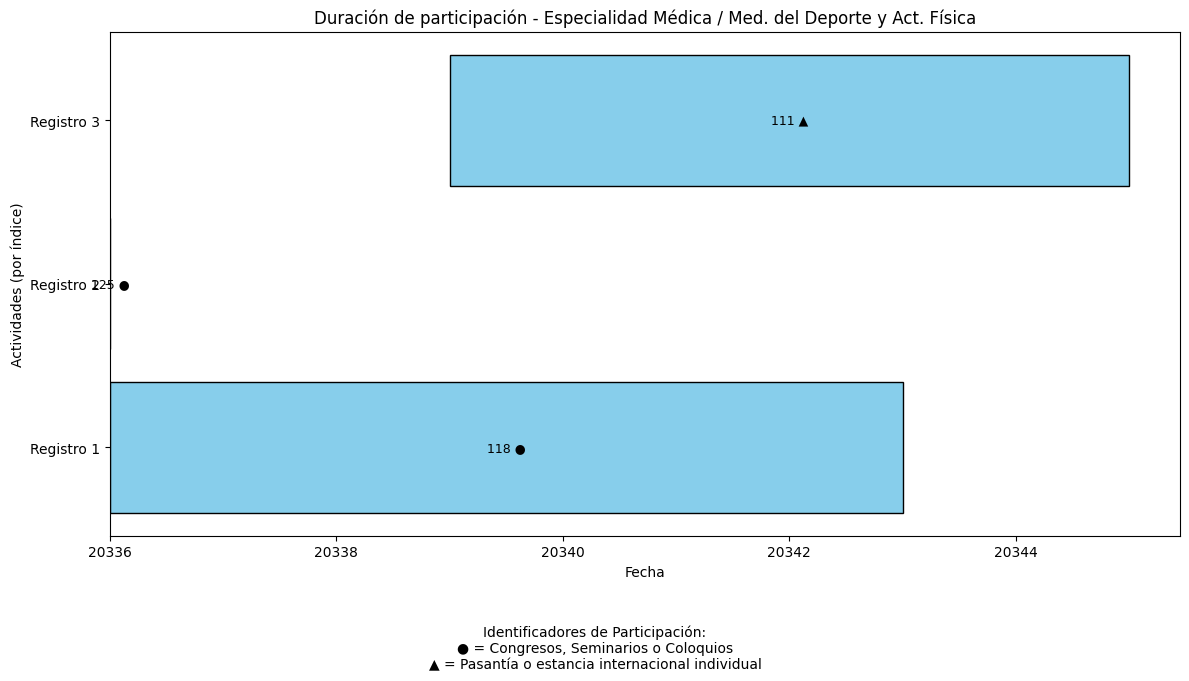

In [14]:

graficar_duracion_participacion(
    dfs_subdivididos,
    dependencia='Especialidad Médica',
    subgrupo='Med. del Deporte y Act. Física',
    fecha_inicio='2025-09-01',
    fecha_fin='2025-09-15'
)

In [15]:

def graficar_conteo_sedes(df):
    """
    Genera un gráfico de barras horizontales mostrando la cantidad de registros por 'Sede'.
    Si hay múltiples sedes en una misma celda (separadas por ';'), se cuentan individualmente.
    Además, se muestra una tabla con el conteo debajo del gráfico, bien alineada.
    """

    if 'Sede' not in df.columns:
        print("⚠ El DataFrame no contiene la columna 'Sede'.")
        return

    # Copiar columna y limpiar
    sedes = df['Sede'].astype(str)
    sedes = sedes.str.split(';').explode().str.strip()
    sedes = sedes[sedes != '']
    sedes = sedes.dropna()
    sedes = sedes.str.title()

    # Contar
    conteo = sedes.value_counts().reset_index()
    conteo.columns = ['Sede', 'Cantidad']

    if conteo.empty:
        print("⚠ No hay datos válidos en la columna 'Sede'.")
        return

    # Crear figura con dos zonas (gráfico arriba, tabla abajo)
    fig = plt.figure(figsize=(10, 7))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])  # 3:1 = más espacio al gráfico

    # ----- GRÁFICO -----
    ax1 = fig.add_subplot(gs[0])
    ax1.barh(conteo['Sede'], conteo['Cantidad'], color='skyblue', edgecolor='black')
    ax1.set_xlabel('Cantidad de registros')
    ax1.set_ylabel('Sede')
    ax1.set_title('Cantidad de registros por sede', pad=15)
    ax1.invert_yaxis()

    # ----- TABLA -----
    ax2 = fig.add_subplot(gs[1])
    ax2.axis('off')  # ocultar ejes
    tabla = ax2.table(
        cellText=conteo.values,
        colLabels=conteo.columns,
        cellLoc='center',
        loc='center'
    )
    tabla.scale(1, 1.5)
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(9)

    plt.tight_layout()
    plt.show()

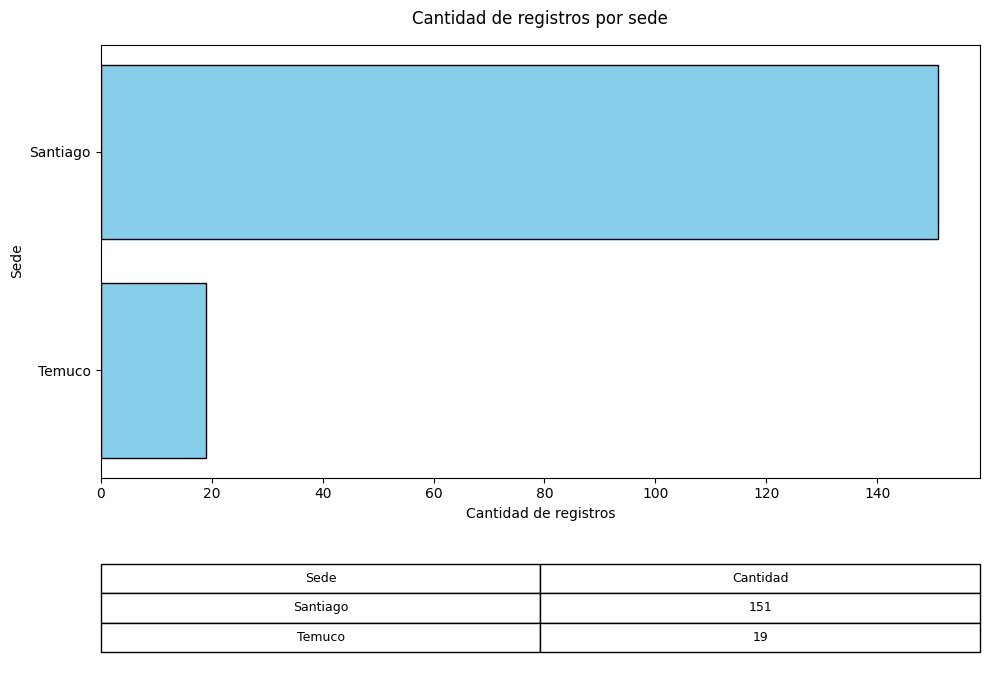

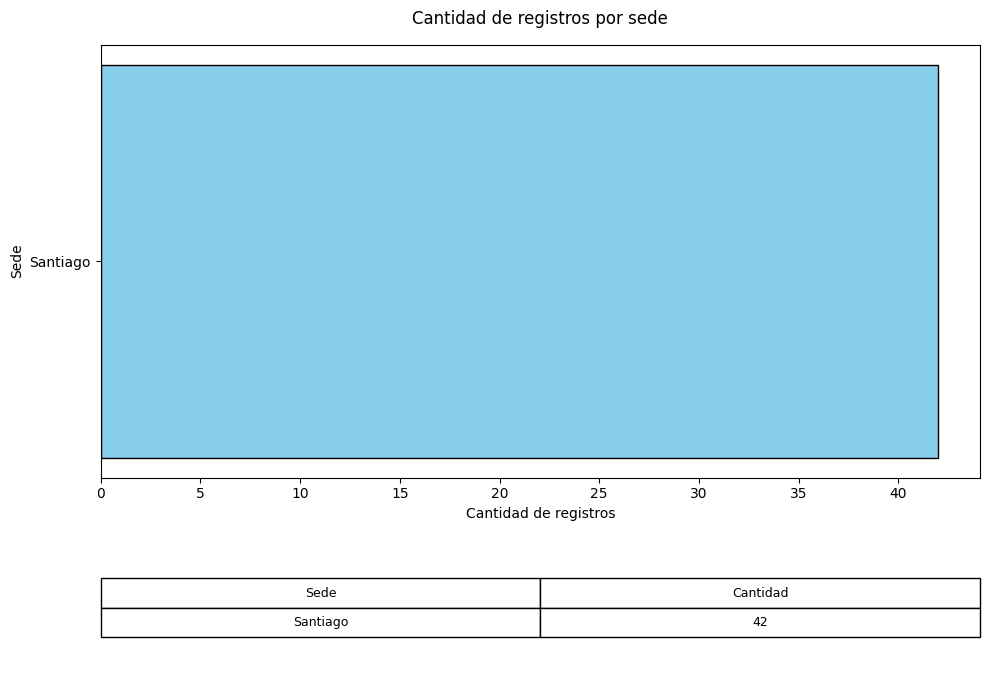

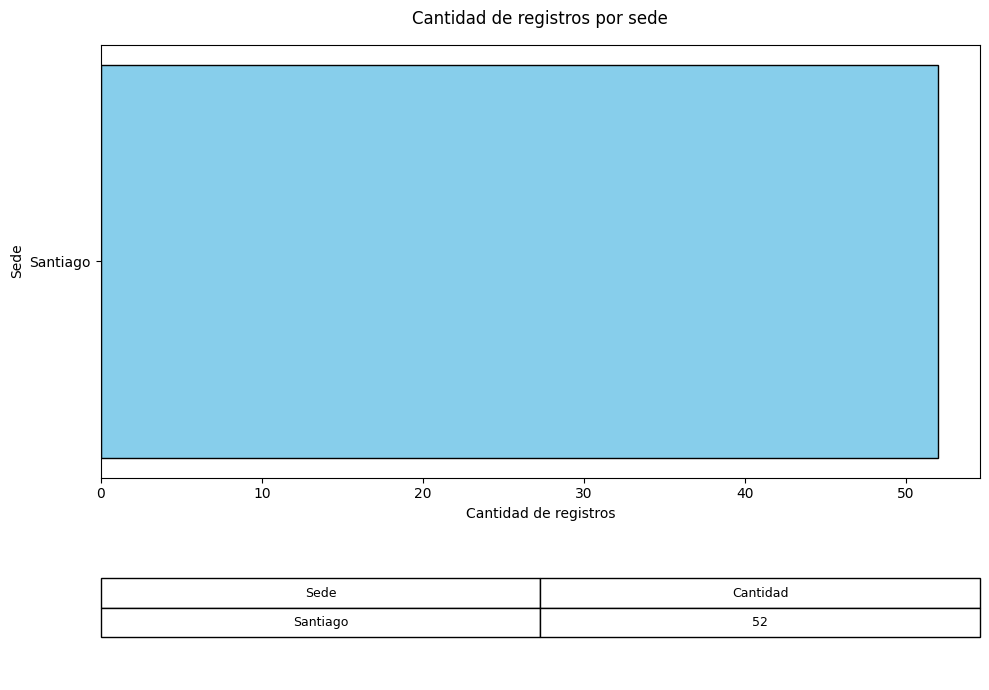

In [17]:

graficar_conteo_sedes(df_intit)
graficar_conteo_sedes(dfs_subdivididos['Especialidad Médica']['Med. del Deporte y Act. Física'])
graficar_conteo_sedes(df_dependencias['Especialidad Médica'])



In [18]:
def graficar_participacion(df_init, df_dependencias=None, dfs_subdivididos=None,
                           dependencia=None, subdependencia=None):
    """
    Genera un gráfico de torta mostrando la distribución de la columna 'Participación'.
    Permite hacerlo:
      - A nivel global (df_init)
      - Por dependencia (df_dependencias)
      - Por subdependencia (dfs_subdivididos)
    Incluye una tabla debajo del gráfico con columnas: Color | Participación | Cantidad | Porcentaje (%)
    """

    # 1️⃣ Determinar qué DataFrame usar
    if dependencia and subdependencia:
        try:
            df = dfs_subdivididos[dependencia][subdependencia]
            nivel = f"{dependencia} → {subdependencia}"
        except KeyError:
            print("⚠ No se encontró la subdependencia especificada.")
            return
    elif dependencia:
        try:
            df = df_dependencias[dependencia]
            nivel = dependencia
        except KeyError:
            print("⚠ No se encontró la dependencia especificada.")
            return
    else:
        df = df_init
        nivel = "Todos los datos"

    # 2️⃣ Verificar que exista la columna 'Participación'
    if 'Participación' not in df.columns:
        print("⚠ La columna 'Participación' no está en el DataFrame.")
        return

    # 3️⃣ Limpiar y contar
    participacion = df['Participación'].dropna().astype(str).str.strip()
    conteo = participacion.value_counts()

    if conteo.empty:
        print("⚠ No hay valores válidos en la columna 'Participación'.")
        return

    # 4️⃣ Crear gráfico de torta
    fig, ax = plt.subplots(figsize=(8, 8))
    wedges, texts, autotexts = ax.pie(
        conteo.values,
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True
    )
    ax.set_title(f"Distribución de Participación ({nivel})", pad=20)
    ax.axis('equal')

    # 5️⃣ Preparar la tabla de resumen
    colors = [w.get_facecolor() for w in wedges]
    porcentajes = (conteo / conteo.sum() * 100).round(1).astype(str) + '%'  # ← agrega símbolo %

    resumen = pd.DataFrame({
        "Color": ["■"] * len(conteo),
        "Participación": conteo.index,
        "Cantidad": conteo.values,
        "Porcentaje": porcentajes.values  # ← columna renombrada
    })

    # 6️⃣ Agregar la tabla debajo
    plt.subplots_adjust(bottom=0.35)  # más espacio para texto largo
    tabla = plt.table(
        cellText=resumen.values,
        colLabels=resumen.columns,
        cellLoc='center',
        loc='bottom'
    )

    tabla.scale(1.2, 1.4)  # ampliar ancho y alto de celdas
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(9)

    # 7️⃣ Pintar columna de color manualmente (primera celda)
    for i, color in enumerate(colors, start=1):
        tabla[(i, 0)].set_facecolor(color)
        tabla[(i, 0)]._text.set_text("")  # deja la celda pintada sin texto

    # 8️⃣ Ajustar el ancho de la columna “Participación”
    #    Esto evita que el texto se salga del borde
    col_widths = [0.1, 0.45, 0.2, 0.25]  # proporción de ancho de columnas
    tabla.auto_set_column_width(col=list(range(len(col_widths))))
    for i, width in enumerate(col_widths):
        for key, cell in tabla.get_celld().items():
            if key[1] == i:
                cell.set_width(width)

    plt.show()


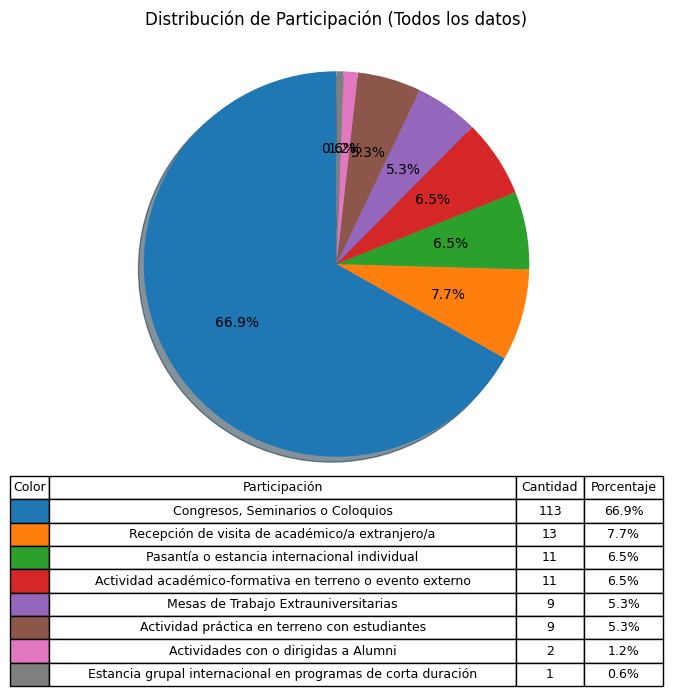

In [19]:
graficar_participacion(df_intit)


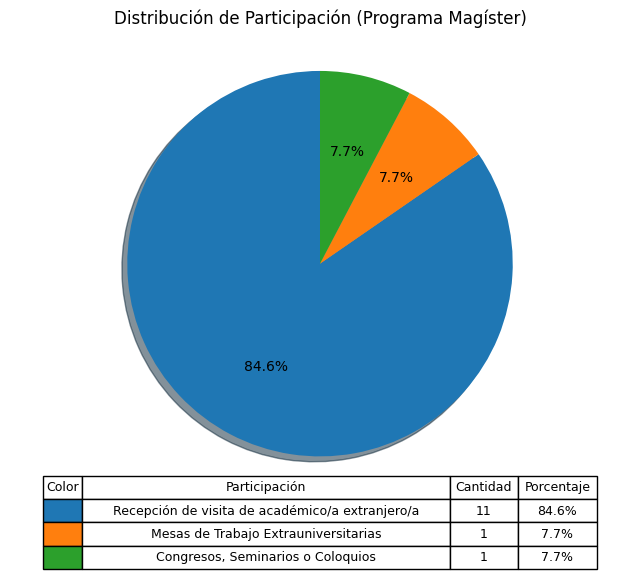

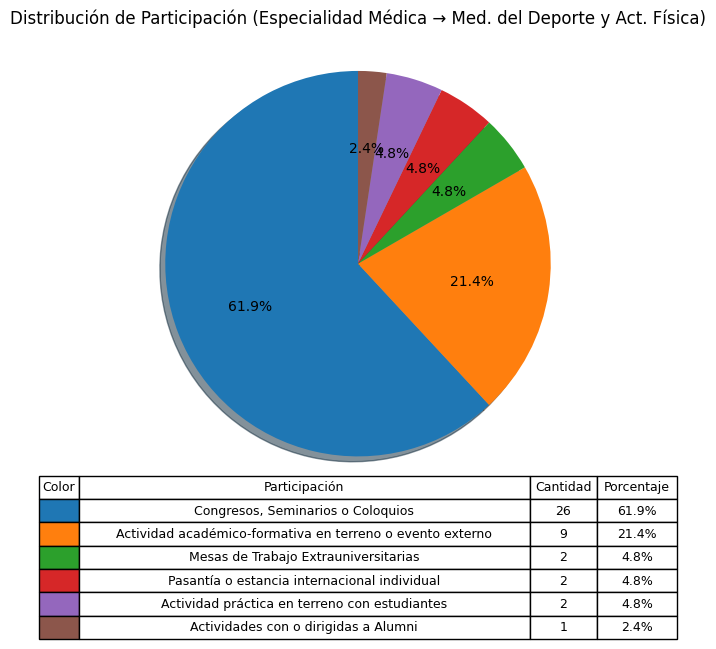

In [20]:
graficar_participacion(df_intit, df_dependencias=df_dependencias, dependencia="Programa Magíster")
graficar_participacion(df_intit, df_dependencias=df_dependencias, dfs_subdivididos=dfs_subdivididos,
                       dependencia="Especialidad Médica", subdependencia="Med. del Deporte y Act. Física")